In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Parkinsson disease1.csv")

In [3]:
df

name  age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0    phon_R01_S01_1   25      119.992       157.302        74.997   
1    phon_R01_S01_2   28      122.400       148.650       113.819   
2    phon_R01_S01_3   27      116.682       131.111       111.555   
3    phon_R01_S01_4   27      116.676       137.871       111.366   
4    phon_R01_S01_5   27      116.014       141.781       110.655   
..              ...  ...          ...           ...           ...   
190  phon_R01_S50_2   65      174.188       230.978        94.261   
191  phon_R01_S50_3   65      209.516       253.017        89.488   
192  phon_R01_S50_4   65      174.688       240.005        74.287   
193  phon_R01_S50_5   65      198.764       396.961        74.904   
194  phon_R01_S50_6   65      214.289       260.277        77.973   

     MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  ...  \
0           0.00784           0.00007   0.00370   0.00554     0.01109  ...   
1           0.00968           0.00008   0.00465   0.00696     0.01394  ...   
2           0.01050           0.00009   0.00544   0.00781     0.01633  ...   
3           0.00997           0.00009   0.00502   0.00698     0.01505  ...   
4           0.01284           0.00011   0.00655   0.00908     0.01966  ...   
..              ...               ...       ...       ...         ...  ...   
190         0.00459           0.00003   0.00263   0.00259     0.00790  ...   
191         0.00564           0.00003   0.00331   0.00292     0.00994  ...   
192         0.01360           0.00008   0.00624   0.00564     0.01873  ...   
193         0.00740           0.00004   0.00370   0.00390     0.01109  ...   
194         0.00567           0.00003   0.00295   0.00317     0.00885  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 25 columns]

In [4]:
df.head(5)

name  age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0  phon_R01_S01_1   25      119.992       157.302        74.997   
1  phon_R01_S01_2   28      122.400       148.650       113.819   
2  phon_R01_S01_3   27      116.682       131.111       111.555   
3  phon_R01_S01_4   27      116.676       137.871       111.366   
4  phon_R01_S01_5   27      116.014       141.781       110.655   

   MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  ...  \
0         0.00784           0.00007   0.00370   0.00554     0.01109  ...   
1         0.00968           0.00008   0.00465   0.00696     0.01394  ...   
2         0.01050           0.00009   0.00544   0.00781     0.01633  ...   
3         0.00997           0.00009   0.00502   0.00698     0.01505  ...   
4         0.01284           0.00011   0.00655   0.00908     0.01966  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 25 columns]

In [5]:
df.tail(5)

name  age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
190  phon_R01_S50_2   65      174.188       230.978        94.261   
191  phon_R01_S50_3   65      209.516       253.017        89.488   
192  phon_R01_S50_4   65      174.688       240.005        74.287   
193  phon_R01_S50_5   65      198.764       396.961        74.904   
194  phon_R01_S50_6   65      214.289       260.277        77.973   

     MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  ...  \
190         0.00459           0.00003   0.00263   0.00259     0.00790  ...   
191         0.00564           0.00003   0.00331   0.00292     0.00994  ...   
192         0.01360           0.00008   0.00624   0.00564     0.01873  ...   
193         0.00740           0.00004   0.00370   0.00390     0.01109  ...   
194         0.00567           0.00003   0.00295   0.00317     0.00885  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 25 columns]

In [6]:
df.dtypes

name                 object
age                   int64
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
df.describe(include="all")

name         age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
count              195  195.000000   195.000000    195.000000    195.000000   
unique             195         NaN          NaN           NaN           NaN   
top     phon_R01_S10_1         NaN          NaN           NaN           NaN   
freq                 1         NaN          NaN           NaN           NaN   
mean               NaN   46.061538   154.228641    197.104918    116.324631   
std                NaN   10.715934    41.390065     91.491548     43.521413   
min                NaN   25.000000    88.333000    102.145000     65.476000   
25%                NaN   36.000000   117.572000    134.862500     84.291000   
50%                NaN   42.000000   148.790000    175.829000    104.315000   
75%                NaN   55.000000   182.769000    224.205500    140.018500   
max                NaN   65.000000   260.105000    592.030000    239.170000   

        MDVP:Jitter(%)  MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  \
count       195.000000        195.000000  195.000000  195.000000  195.000000   
unique             NaN               NaN         NaN         NaN         NaN   
top                NaN               NaN         NaN         NaN         NaN   
freq               NaN               NaN         NaN         NaN         NaN   
mean          0.006220          0.000044    0.003306    0.003446    0.009920   
std           0.004848          0.000035    0.002968    0.002759    0.008903   
min           0.001680          0.000007    0.000680    0.000920    0.002040   
25%           0.003460          0.000020    0.001660    0.001860    0.004985   
50%           0.004940          0.000030    0.002500    0.002690    0.007490   
75%           0.007365          0.000060    0.003835    0.003955    0.011505   
max           0.033160          0.000260    0.021440    0.019580    0.064330   

        ...  Shimmer:DDA         NHR         HNR      status        RPDE  \
count   ...   195.000000  195.000000  195.000000  195.000000  195.000000   
unique  ...          NaN         NaN         NaN         NaN         NaN   
top     ...          NaN         NaN         NaN         NaN         NaN   
freq    ...          NaN         NaN         NaN         NaN         NaN   
mean    ...     0.046993    0.024847   21.885974    0.753846    0.498536   
std     ...     0.030459    0.040418    4.425764    0.431878    0.103942   
min     ...     0.013640    0.000650    8.441000    0.000000    0.256570   
25%     ...     0.024735    0.005925   19.198000    1.000000    0.421306   
50%     ...     0.038360    0.011660   22.085000    1.000000    0.495954   
75%     ...     0.060795    0.025640   25.075500    1.000000    0.587562   
max     ...     0.169420    0.314820   33.047000    1.000000    0.685151   

               DFA     spread1     spread2          D2         PPE  
count   195.000000  195.000000  195.000000  195.000000  195.000000  
unique         NaN         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN         NaN  
mean      0.718099   -5.684397    0.226510    2.381826    0.206552  
std       0.055336    1.090208    0.083406    0.382799    0.090119  
min       0.574282   -7.964984    0.006274    1.423287    0.044539  
25%       0.674758   -6.450096    0.174351    2.099125    0.137451  
50%       0.722254   -5.720868    0.218885    2.361532    0.194052  
75%       0.761881   -5.046192    0.279234    2.636456    0.252980  
max       0.825288   -2.434031    0.450493    3.671155    0.527367  

[11 rows x 25 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   age               195 non-null    int64  
 2   MDVP:Fo(Hz)       195 non-null    float64
 3   MDVP:Fhi(Hz)      195 non-null    float64
 4   MDVP:Flo(Hz)      195 non-null    float64
 5   MDVP:Jitter(%)    195 non-null    float64
 6   MDVP:Jitter(Abs)  195 non-null    float64
 7   MDVP:RAP          195 non-null    float64
 8   MDVP:PPQ          195 non-null    float64
 9   Jitter:DDP        195 non-null    float64
 10  MDVP:Shimmer      195 non-null    float64
 11  MDVP:Shimmer(dB)  195 non-null    float64
 12  Shimmer:APQ3      195 non-null    float64
 13  Shimmer:APQ5      195 non-null    float64
 14  MDVP:APQ          195 non-null    float64
 15  Shimmer:DDA       195 non-null    float64
 16  NHR               195 non-null    float64
 1

In [9]:
df1=df.replace('?',np.NaN)

In [10]:
df1

name  age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0    phon_R01_S01_1   25      119.992       157.302        74.997   
1    phon_R01_S01_2   28      122.400       148.650       113.819   
2    phon_R01_S01_3   27      116.682       131.111       111.555   
3    phon_R01_S01_4   27      116.676       137.871       111.366   
4    phon_R01_S01_5   27      116.014       141.781       110.655   
..              ...  ...          ...           ...           ...   
190  phon_R01_S50_2   65      174.188       230.978        94.261   
191  phon_R01_S50_3   65      209.516       253.017        89.488   
192  phon_R01_S50_4   65      174.688       240.005        74.287   
193  phon_R01_S50_5   65      198.764       396.961        74.904   
194  phon_R01_S50_6   65      214.289       260.277        77.973   

     MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  ...  \
0           0.00784           0.00007   0.00370   0.00554     0.01109  ...   
1           0.00968           0.00008   0.00465   0.00696     0.01394  ...   
2           0.01050           0.00009   0.00544   0.00781     0.01633  ...   
3           0.00997           0.00009   0.00502   0.00698     0.01505  ...   
4           0.01284           0.00011   0.00655   0.00908     0.01966  ...   
..              ...               ...       ...       ...         ...  ...   
190         0.00459           0.00003   0.00263   0.00259     0.00790  ...   
191         0.00564           0.00003   0.00331   0.00292     0.00994  ...   
192         0.01360           0.00008   0.00624   0.00564     0.01873  ...   
193         0.00740           0.00004   0.00370   0.00390     0.01109  ...   
194         0.00567           0.00003   0.00295   0.00317     0.00885  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 25 columns]

Dealing with missing values with python

In [11]:
#df.dropna(subset=["required column name", axis=0, inplace=true])
#mean = df["normalized-loses"].mean()
#df["normalized-loses"].replace(np.nan, mean)


Normalising

normalising by simple feature scaling

In [12]:
#df1["MDVP:Fo(Hz)"]=df1["MDVP:Fo(Hz)"]/df1["MDVP:Fo(Hz)"].max()
#df1["MDVP:Fhi(Hz)"]=df1["MDVP:Fhi(Hz)"]/df1["MDVP:Fhi(Hz)"].max()
#df1["MDVP:Flo(Hz)"]=df1["MDVP:Flo(Hz)"]/df1["MDVP:Flo(Hz)"].max()

In [13]:
#df1

Normalising by min max 

In [14]:
#df1["MDVP:Fo(Hz)"]=(df1["MDVP:Fo(Hz)"]-df1["MDVP:Fo(Hz)"].min())/(df1["MDVP:Fo(Hz)"].max()-df1["MDVP:Fo(Hz)"].min())
#df1["MDVP:Fhi(Hz)"]=(df1["MDVP:Fhi(Hz)"]-df1["MDVP:Fhi(Hz)"].min())/(df1["MDVP:Fhi(Hz)"].max()-df1["MDVP:Fhi(Hz)"].min())
#df1["MDVP:Flo(Hz)"]=(df1["MDVP:Flo(Hz)"]-df1["MDVP:Flo(Hz)"].min())/(df1["MDVP:Flo(Hz)"].max()-df1["MDVP:Flo(Hz)"].min())

In [15]:
#df1

Normalising by z score

In [16]:
df1["MDVP:Fo(Hz)"]=(df1["MDVP:Fo(Hz)"]-df1["MDVP:Fo(Hz)"].mean())/df1["MDVP:Fo(Hz)"].std()
df1["MDVP:Fhi(Hz)"]=(df1["MDVP:Fhi(Hz)"]-df1["MDVP:Fhi(Hz)"].mean())/df1["MDVP:Fhi(Hz)"].std()
df1["MDVP:Flo(Hz)"]=(df1["MDVP:Flo(Hz)"]-df1["MDVP:Flo(Hz)"].mean())/df1["MDVP:Flo(Hz)"].std()

In [17]:
df1

name  age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0    phon_R01_S01_1   25    -0.827171     -0.435045     -0.949593   
1    phon_R01_S01_2   28    -0.768992     -0.529611     -0.057572   
2    phon_R01_S01_3   27    -0.907141     -0.721312     -0.109593   
3    phon_R01_S01_4   27    -0.907286     -0.647425     -0.113935   
4    phon_R01_S01_5   27    -0.923281     -0.604689     -0.130272   
..              ...  ...          ...           ...           ...   
190  phon_R01_S50_2   65     0.482226      0.370232     -0.506960   
191  phon_R01_S50_3   65     1.335764      0.611117     -0.616630   
192  phon_R01_S50_4   65     0.494306      0.468897     -0.965907   
193  phon_R01_S50_5   65     1.075992      2.184421     -0.951730   
194  phon_R01_S50_6   65     1.451082      0.690469     -0.881213   

     MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  ...  \
0           0.00784           0.00007   0.00370   0.00554     0.01109  ...   
1           0.00968           0.00008   0.00465   0.00696     0.01394  ...   
2           0.01050           0.00009   0.00544   0.00781     0.01633  ...   
3           0.00997           0.00009   0.00502   0.00698     0.01505  ...   
4           0.01284           0.00011   0.00655   0.00908     0.01966  ...   
..              ...               ...       ...       ...         ...  ...   
190         0.00459           0.00003   0.00263   0.00259     0.00790  ...   
191         0.00564           0.00003   0.00331   0.00292     0.00994  ...   
192         0.01360           0.00008   0.00624   0.00564     0.01873  ...   
193         0.00740           0.00004   0.00370   0.00390     0.01109  ...   
194         0.00567           0.00003   0.00295   0.00317     0.00885  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 25 columns]

Binning

In [18]:
bins = np.linspace(min(df["age"]), max(df["age"]), 4)
bins

array([25.        , 38.33333333, 51.66666667, 65.        ])

In [19]:
#nBins=3
#my_bins = np.linspace(df1.age.min(),df1.age.max(),nBins)

In [20]:
group = ["young", "middle aged", "old aged"]

In [21]:
df1["ages binned"]=pd.cut(df1["age"], bins, labels=group, include_lowest=True)

In [22]:
df1["ages binned"].value_counts()

old aged       91
young          55
middle aged    49
Name: ages binned, dtype: int64

<AxesSubplot:>

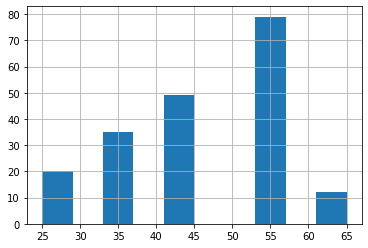

In [23]:
df1.age.hist(bins=10)

univariate analysis

In [24]:
status_value_counts = df1['status'].value_counts()
print(status_value_counts)
#status_value_counts[1]

1    147
0     48
Name: status, dtype: int64


<AxesSubplot:xlabel='age', ylabel='MDVP:Flo(Hz)'>

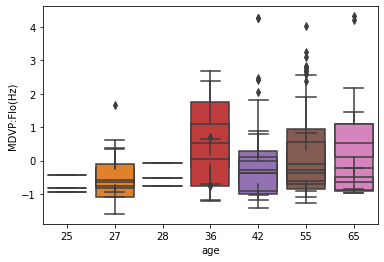

In [25]:
sns.boxplot(x="age" , y="MDVP:Fo(Hz)",data=df1 )
sns.boxplot(x="age" , y="MDVP:Fhi(Hz)",data=df1 )
sns.boxplot(x="age" , y="MDVP:Flo(Hz)",data=df1 )

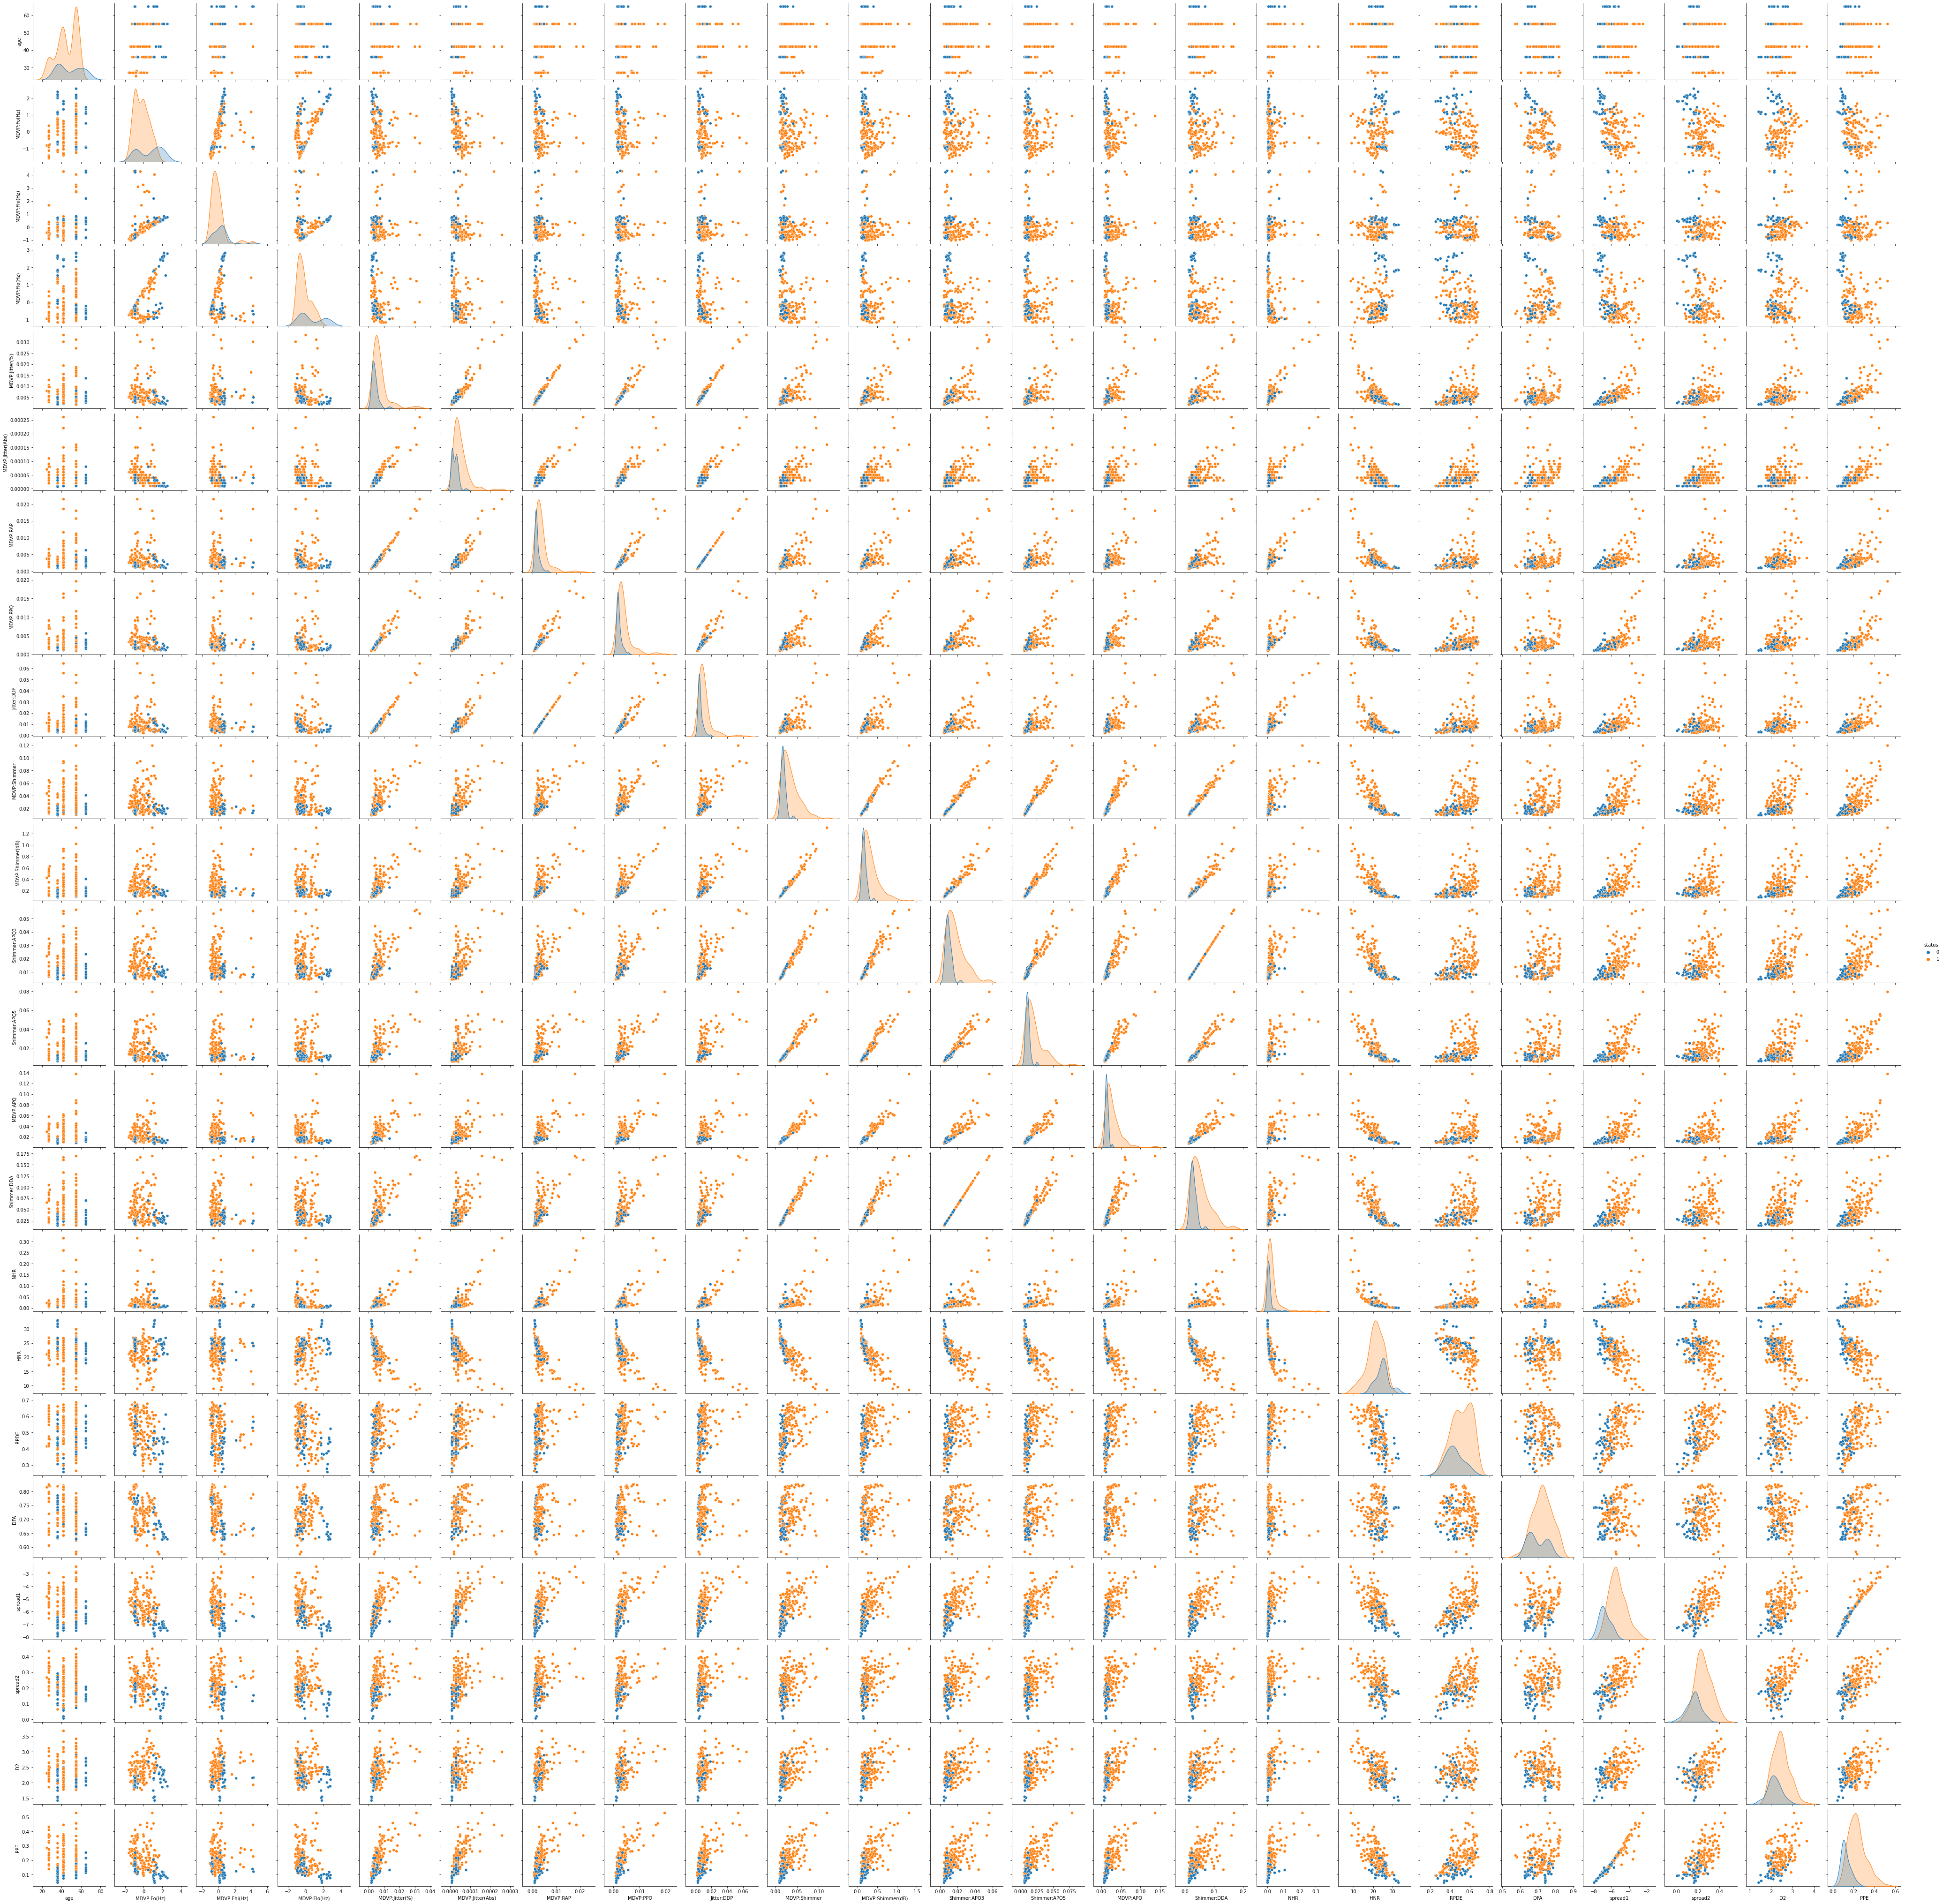

In [26]:
 sns.pairplot(df1, hue="status", diag_kind='kde')

In [27]:
 print(df1.dtypes)

name                  object
age                    int64
MDVP:Fo(Hz)          float64
MDVP:Fhi(Hz)         float64
MDVP:Flo(Hz)         float64
MDVP:Jitter(%)       float64
MDVP:Jitter(Abs)     float64
MDVP:RAP             float64
MDVP:PPQ             float64
Jitter:DDP           float64
MDVP:Shimmer         float64
MDVP:Shimmer(dB)     float64
Shimmer:APQ3         float64
Shimmer:APQ5         float64
MDVP:APQ             float64
Shimmer:DDA          float64
NHR                  float64
HNR                  float64
status                 int64
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
ages binned         category
dtype: object


In [28]:
df.corr()

age  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
age               1.000000     0.089055      0.203384     -0.070413   
MDVP:Fo(Hz)       0.089055     1.000000      0.400985      0.596546   
MDVP:Fhi(Hz)      0.203384     0.400985      1.000000      0.084951   
MDVP:Flo(Hz)     -0.070413     0.596546      0.084951      1.000000   
MDVP:Jitter(%)    0.050760    -0.118003      0.102086     -0.139919   
MDVP:Jitter(Abs) -0.036655    -0.382027     -0.029198     -0.277815   
MDVP:RAP          0.073719    -0.076194      0.097177     -0.100519   
MDVP:PPQ          0.009053    -0.112165      0.091126     -0.095828   
Jitter:DDP        0.073765    -0.076213      0.097150     -0.100488   
MDVP:Shimmer     -0.060654    -0.098374      0.002281     -0.144543   
MDVP:Shimmer(dB) -0.029842    -0.073742      0.043465     -0.119089   
Shimmer:APQ3     -0.062910    -0.094717     -0.003743     -0.150747   
Shimmer:APQ5     -0.081265    -0.070682     -0.009997     -0.101095   
MDVP:APQ         -0.032906    -0.077774      0.004937     -0.107293   
Shimmer:DDA      -0.062916    -0.094732     -0.003733     -0.150737   
NHR               0.108429    -0.021981      0.163766     -0.108670   
HNR              -0.130001     0.059144     -0.024893      0.210851   
status           -0.143732    -0.383535     -0.166136     -0.380200   
RPDE              0.037114    -0.383894     -0.112404     -0.400143   
DFA              -0.331464    -0.446013     -0.343097     -0.050406   
spread1          -0.030543    -0.413738     -0.076658     -0.394857   
spread2          -0.121081    -0.249450     -0.002954     -0.243829   
D2                0.083313     0.177980      0.176323     -0.100629   
PPE              -0.108985    -0.372356     -0.069543     -0.340071   

                  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  \
age                     0.050760         -0.036655  0.073719  0.009053   
MDVP:Fo(Hz)            -0.118003         -0.382027 -0.076194 -0.112165   
MDVP:Fhi(Hz)            0.102086         -0.029198  0.097177  0.091126   
MDVP:Flo(Hz)           -0.139919         -0.277815 -0.100519 -0.095828   
MDVP:Jitter(%)          1.000000          0.935714  0.990276  0.974256   
MDVP:Jitter(Abs)        0.935714          1.000000  0.922911  0.897778   
MDVP:RAP                0.990276          0.922911  1.000000  0.957317   
MDVP:PPQ                0.974256          0.897778  0.957317  1.000000   
Jitter:DDP              0.990276          0.922913  1.000000  0.957319   
MDVP:Shimmer            0.769063          0.703322  0.759581  0.797826   
MDVP:Shimmer(dB)        0.804289          0.716601  0.790652  0.839239   
Shimmer:APQ3            0.746625          0.697153  0.744912  0.763580   
Shimmer:APQ5            0.725561          0.648961  0.709927  0.786780   
MDVP:APQ                0.758255          0.648793  0.737455  0.804139   
Shimmer:DDA             0.746635          0.697170  0.744919  0.763592   
NHR                     0.906959          0.834972  0.919521  0.844604   
HNR                    -0.728165         -0.656810 -0.721543 -0.731510   
status                  0.278220          0.338653  0.266668  0.288698   
RPDE                    0.360673          0.441839  0.342140  0.333274   
DFA                     0.098572          0.175036  0.064083  0.196301   
spread1                 0.693577          0.735779  0.648328  0.716489   
spread2                 0.385123          0.388543  0.324407  0.407605   
D2                      0.433434          0.310694  0.426605  0.412524   
PPE                     0.721543          0.748162  0.670999  0.769647   

                  Jitter:DDP  MDVP:Shimmer  ...  Shimmer:DDA       NHR  \
age                 0.073765     -0.060654  ...    -0.062916  0.108429   
MDVP:Fo(Hz)        -0.076213     -0.098374  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)        0.097150      0.002281  ...    -0.003733  0.163766   
MDVP:Flo(Hz)       -0.100488     -0.144543  ...    -0.150737 -0.108670   
MDVP:Jitter(%)      0.9902

In [29]:
df[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ"]].corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165  
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126  
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828  
MDVP:Jitter(%)            0.935714  0.990276  0.974256  
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778  
MDVP:RAP                  0.922911  1.000000  0.957317  
MDVP:PPQ                  0.897778  0.957317  1.000000

(0.0, 616.5242499999999)

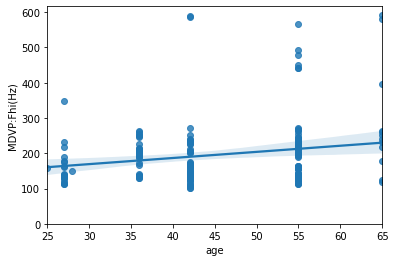

In [30]:
sns.regplot(x="age", y="MDVP:Fhi(Hz)", data=df)
plt.ylim(0,)

Weak Linear Relationship

<AxesSubplot:xlabel='age', ylabel='MDVP:Fhi(Hz)'>

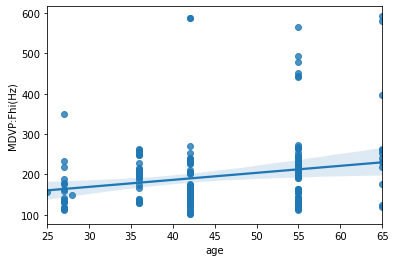

In [31]:
sns.regplot(x="age", y="MDVP:Fhi(Hz)", data=df)

*Categorical variables*
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='age', ylabel='MDVP:Fhi(Hz)'>

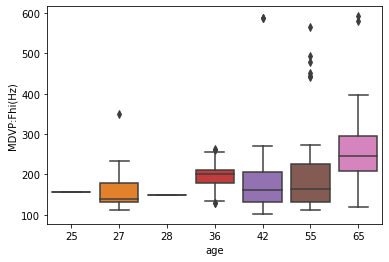

In [32]:
sns.boxplot(x="age", y="MDVP:Fhi(Hz)", data=df)

Descriptive Statistical Analysis

In [33]:
df1.describe()

age   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count  195.000000  1.950000e+02  1.950000e+02  1.950000e+02      195.000000   
mean    46.061538 -6.558856e-16 -5.192428e-16  1.047595e-16        0.006220   
std     10.715934  1.000000e+00  1.000000e+00  1.000000e+00        0.004848   
min     25.000000 -1.592064e+00 -1.037909e+00 -1.168359e+00        0.001680   
25%     36.000000 -8.856386e-01 -6.803078e-01 -7.360430e-01        0.003460   
50%     42.000000 -1.313997e-01 -2.325452e-01 -2.759476e-01        0.004940   
75%     55.000000  6.895461e-01  2.962086e-01  5.444187e-01        0.007365   
max     65.000000  2.558014e+00  4.316520e+00  2.822642e+00        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       ...  Shimmer:DDA         NHR         HNR      status        RPDE  \
count  ...   195.000000  195.000000  195.000000  195.000000  195.000000   
mean   ...     0.046993    0.024847   21.885974    0.753846    0.498536   
std    ...     0.030459    0.040418    4.425764    0.431878    0.103942   
min    ...     0.013640    0.000650    8.441000    0.000000    0.256570   
25%    ...     0.024735    0.005925   19.198000    1.000000    0.421306   
50%    ...     0.038360    0.011660   22.085000    1.000000    0.495954   
75%    ...     0.060795    0.025640   25.075500    1.000000    0.587562   
max    ...     0.169420    0.314820   33.047000    1.000000    0.685151   

              DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 24 columns]

In [34]:
df1.describe(include=['object'])

name
count              195
unique             195
top     phon_R01_S10_1
freq                 1

In [35]:
df['MDVP:Fo(Hz)'].value_counts()

100.960    1
154.003    1
159.116    1
148.790    1
222.236    1
          ..
169.774    1
242.852    1
198.458    1
128.001    1
176.858    1
Name: MDVP:Fo(Hz), Length: 195, dtype: int64

In [36]:
df['MDVP:Fo(Hz)'].value_counts().to_frame()

MDVP:Fo(Hz)
100.960            1
154.003            1
159.116            1
148.790            1
222.236            1
...              ...
169.774            1
242.852            1
198.458            1
128.001            1
176.858            1

[195 rows x 1 columns]

In [37]:
print(df.columns)

Index(['name', 'age', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [38]:
X = df1[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]

y = df1["status"]

Splitting the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [39]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.40, random_state=1)

Creating the model using “entropy” method of reducing the entropy and fit it to training data

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [41]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [42]:
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(train_set))

Parkinson_File.close()

In [43]:
y_predict = dt_model.predict(test_set)

In [44]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.8717948717948718


In [45]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[14  8]
 [ 2 54]]


Regularising the Decision Tree

In [46]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [47]:
Parkinson_File_reg = open('parkinson_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Parkinson_File_reg, feature_names = list(train_set))

Parkinson_File_reg.close()

In [48]:
y_predict = reg_dt_model.predict(test_set)

In [49]:
print(reg_dt_model.score(train_set , train_labels))
print(reg_dt_model.score(test_set , test_labels))

1.0
0.8717948717948718


In [50]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[15  7]
 [ 3 53]]


Randomforestclassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [52]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.8846153846153846
[[14  8]
 [ 1 55]]


XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

In [53]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [54]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [56]:
model=XGBClassifier()
model.fit(x_train,y_train)

[14:26:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)


97.43589743589743
